#3.TMI (Too Much Information)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Part A data cleaning

In [4]:
df = pd.read_csv('customer_data.csv')
df.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city
0,1001,Emily Martin,45,95726,73,21,58,Miami
1,1002,Patricia Hernandez,22,40492,72,24,28,Phoenix
2,1003,Michael Miller,38,36102,78,29,36,Chicago
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Chicago
4,1005,Sophia Williams,51,115314,76,17,8,Chicago


In [5]:
df = df.drop_duplicates()

In [6]:
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city
0,1001,Emily Martin,45,95726,73,21,58,Miami
1,1002,Patricia Hernandez,22,40492,72,24,28,Phoenix
2,1003,Michael Miller,38,36102,78,29,36,Chicago
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Chicago
4,1005,Sophia Williams,51,115314,76,17,8,Chicago
...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,New York
96,1097,John Rodriguez,48,86556,22,16,32,Los Angeles
97,1098,Alex Thomas,50,33343,32,28,34,Miami
98,1099,Jenny Martin,54,43500,98,32,28,Los Angeles


In [7]:
df['first_name']=df['full_name'].str.split().str[0]

In [8]:
df['first_name']

0         Emily
1      Patricia
2       Michael
3     Elizabeth
4        Sophia
        ...    
95      William
96         John
97         Alex
98        Jenny
99        Craig
Name: first_name, Length: 100, dtype: object

In [9]:
df['city']=df['city'].str.upper()
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia
...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,NEW YORK,William
96,1097,John Rodriguez,48,86556,22,16,32,LOS ANGELES,John
97,1098,Alex Thomas,50,33343,32,28,34,MIAMI,Alex
98,1099,Jenny Martin,54,43500,98,32,28,LOS ANGELES,Jenny


#Part B – Exploratory Data Analysis (EDA & Statistics)

In [10]:
numeric_cols = ['age', 'annual_income', 'spending_score']
stats = pd.DataFrame({'mean': df[numeric_cols].mean(),'median': df[numeric_cols].median(),'mode': df[numeric_cols].mode().iloc[0],'variance': df[numeric_cols].var(),'std_dev': df[numeric_cols].std()})


In [11]:
stats

,mean,median,mode,variance,std_dev
age,42.66,44.5,52.0,1.407519e+02,11.863891
annual_income,76076.89,80318.0,31150.0,7.754951e+08,27847.713515
spending_score,54.78,52.0,78.0,6.998097e+02,26.453916


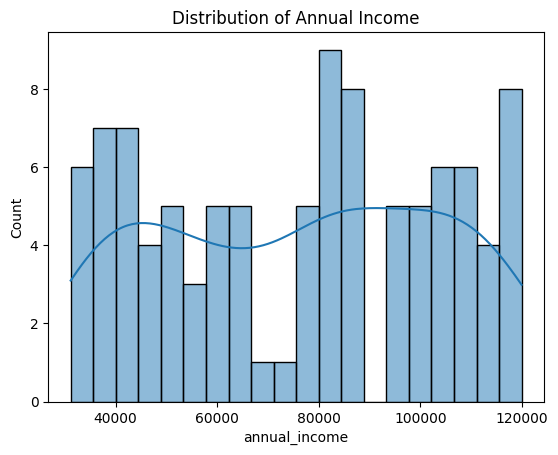

In [12]:
sns.histplot(df['annual_income'],bins=20,kde=True)
plt.title('Distribution of Annual Income')
plt.show()

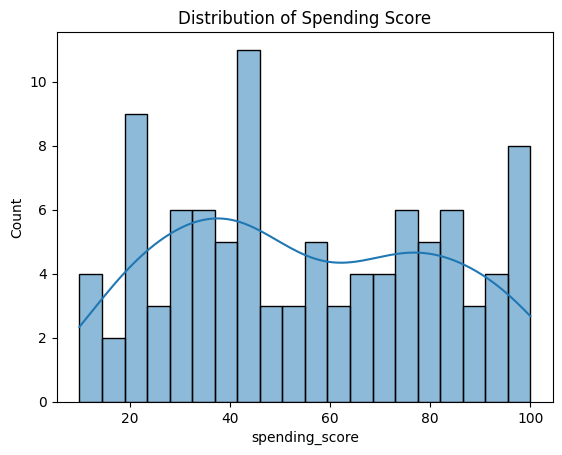

In [13]:
sns.histplot(df['spending_score'],bins=20,kde=True)
plt.title('Distribution of Spending Score')
plt.show()

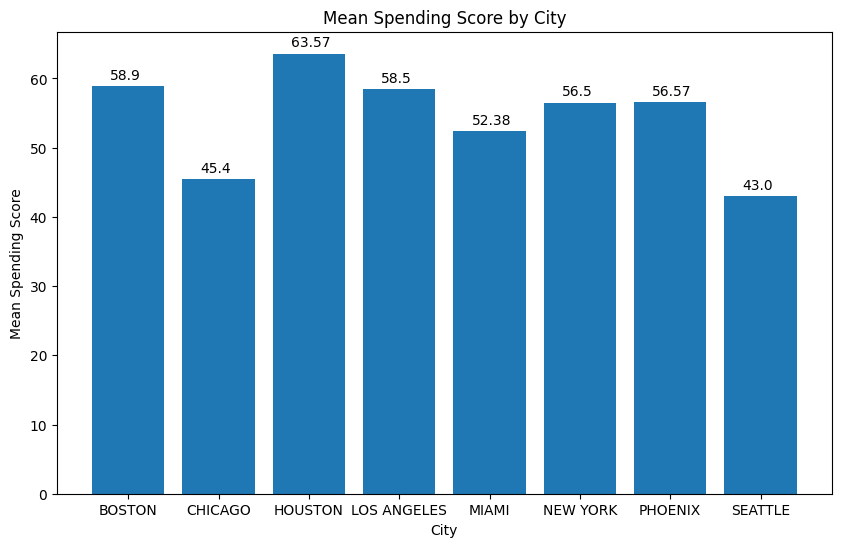

In [14]:
city_mean = df.groupby('city')['spending_score'].mean()
figu = plt.figure(figsize=(10, 6))
bars = plt.bar(city_mean.index, city_mean.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 -0.2, height + 1, str(height.round(2)))
plt.xlabel('City')
plt.ylabel('Mean Spending Score')
plt.title('Mean Spending Score by City')
plt.show()

In [15]:
top_city = city_mean.idxmax()
top_city_score = city_mean.max()
print(top_city, top_city_score)

HOUSTON 63.57142857142857


#Part C – Probability


In [16]:
prob_above_70 = np.mean(df['spending_score'] > 70)
print(prob_above_70,'or')
print(prob_above_70*100,'%')


0.35 or
35.0 %


In [17]:
ny_customers = df[df['city'] == "NEW YORK"]
prob_income = np.mean(ny_customers['annual_income'] > 60000)
print(prob_income,'or')
print(prob_income*100,'%')

0.9 or
90.0 %


#Part D – Linear Algebra

In [18]:
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia
...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,NEW YORK,William
96,1097,John Rodriguez,48,86556,22,16,32,LOS ANGELES,John
97,1098,Alex Thomas,50,33343,32,28,34,MIAMI,Alex
98,1099,Jenny Martin,54,43500,98,32,28,LOS ANGELES,Jenny


In [19]:
age_vec = df['age'].values
income_vec = df['annual_income'].values
dot_product = np.dot(age_vec, income_vec)
print(dot_product)

320139613


In [20]:
from numpy.linalg import norm

In [21]:
norm_income=norm(income_vec)
norm_income
normalize_in=income_vec/norm_income
print(normalize_in)

[0.11823041 0.05001134 0.04458929 0.09922235 0.14242339 0.06995684
 0.07976718 0.07749585 0.06557474 0.11869851 0.10113551 0.08229541
 0.12720336 0.04201042 0.05075363 0.05937087 0.08124064 0.10740113
 0.1384217  0.05030406 0.09265289 0.11896406 0.0713278  0.13347515
 0.10467157 0.04421753 0.06075417 0.09842324 0.1000338  0.0736016
 0.05020278 0.04781782 0.14684132 0.14517888 0.14810235 0.12389949
 0.03997746 0.13286502 0.0452723  0.12354748 0.1314496  0.14564451
 0.1059289  0.0536067  0.07669551 0.13420139 0.05059678 0.10241506
 0.09846894 0.09917788 0.06506094 0.10573499 0.1070343  0.07537025
 0.12389578 0.10252004 0.0559966  0.12107236 0.13602685 0.06114693
 0.04082102 0.09725979 0.14468114 0.14479601 0.10377366 0.11907769
 0.10910185 0.10643899 0.07669057 0.1231115  0.13677161 0.0861279
 0.12673896 0.12786043 0.05807279 0.1403225  0.14410065 0.1282606
 0.13925662 0.13540807 0.07194534 0.06909722 0.07684372 0.0473139
 0.04440032 0.10126519 0.03847311 0.14756879 0.12936353 0.11933088

In [22]:
df['Normalise_anual_income']=normalize_in


In [23]:
df.drop('Normalise_anual_income',axis=1,inplace=True)
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia
...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,NEW YORK,William
96,1097,John Rodriguez,48,86556,22,16,32,LOS ANGELES,John
97,1098,Alex Thomas,50,33343,32,28,34,MIAMI,Alex
98,1099,Jenny Martin,54,43500,98,32,28,LOS ANGELES,Jenny


#Part E – Calculus

In [24]:
df.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia


In [25]:
y_actual= df['spending_score'].values
np.random.seed(42)
y_pred = y_actual + np.random.normal(0, 5, size=len(y_actual))

m = len(y_actual)
J = (1 / (2 * m)) * np.sum((y_actual-y_pred)**2)
gradient = (y_pred - y_actual) / m

print("Cost J(w):", J)
print("Gradient wrt predictions (first 10):", gradient)



Cost J(w): 10.341328673359254
Gradient wrt predictions (first 10): [ 0.02483571 -0.00691322  0.03238443  0.07615149 -0.01170767 -0.01170685
  0.07896064  0.03837174 -0.02347372  0.027128   -0.02317088 -0.02328649
  0.01209811 -0.09566401 -0.08624589 -0.02811438 -0.05064156  0.01571237
 -0.0454012  -0.07061519  0.07328244 -0.01128882  0.00337641 -0.07123741
 -0.02721914  0.00554613 -0.05754968  0.0187849  -0.03003193 -0.01458469
 -0.03008533  0.09261391 -0.00067486 -0.05288555  0.04112725 -0.06104218
  0.01044318 -0.09798351 -0.0664093   0.00984306  0.03692333  0.00856841
 -0.00578241 -0.01505518 -0.0739261  -0.03599221 -0.02303194  0.05285611
  0.01718091 -0.08815201  0.0162042  -0.01925411 -0.0338461   0.03058381
  0.05154998  0.04656401 -0.04196088 -0.01546062  0.01656317  0.04877726
 -0.02395871 -0.00928295 -0.05531675 -0.05981033  0.04062629  0.067812
 -0.00360051  0.05017664  0.0180818  -0.03225599  0.01806978  0.07690183
 -0.0017913   0.07823218 -0.13098726  0.04109513  0.0043523

#Part F – Feature Engineering

In [26]:
df['avg_spend_per_transaction'] = df['spending_score'] / df['num_transactions']


In [27]:
df.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily,3.476190
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia,3.000000
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael,2.689655
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth,1.192308
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia,4.470588


In [28]:
onehotencoded_df = pd.get_dummies(df, columns=['city'],dtype=int)
onehotencoded_df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,first_name,avg_spend_per_transaction,city_BOSTON,city_CHICAGO,city_HOUSTON,city_LOS ANGELES,city_MIAMI,city_NEW YORK,city_PHOENIX,city_SEATTLE
0,1001,Emily Martin,45,95726,73,21,58,Emily,3.476190,0,0,0,0,1,0,0,0
1,1002,Patricia Hernandez,22,40492,72,24,28,Patricia,3.000000,0,0,0,0,0,0,1,0
2,1003,Michael Miller,38,36102,78,29,36,Michael,2.689655,0,1,0,0,0,0,0,0
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Elizabeth,1.192308,0,1,0,0,0,0,0,0
4,1005,Sophia Williams,51,115314,76,17,8,Sophia,4.470588,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,William,5.333333,0,0,0,0,0,1,0,0
96,1097,John Rodriguez,48,86556,22,16,32,John,1.375000,0,0,0,1,0,0,0,0
97,1098,Alex Thomas,50,33343,32,28,34,Alex,1.142857,0,0,0,0,1,0,0,0
98,1099,Jenny Martin,54,43500,98,32,28,Jenny,3.062500,0,0,0,1,0,0,0,0


In [29]:
df['city'].unique()

array(['MIAMI', 'PHOENIX', 'CHICAGO', 'HOUSTON', 'LOS ANGELES', 'BOSTON',
       'NEW YORK', 'SEATTLE'], dtype=object)

In [30]:
df.shape

(100, 10)

In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
scaler = StandardScaler()
df[['age_standardized', 'annual_income_standardized']] = scaler.fit_transform(df[['age', 'annual_income']])

In [33]:
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction,age_standardized,annual_income_standardized
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily,3.476190,0.198231,0.709146
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia,3.000000,-1.750191,-1.284276
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael,2.689655,-0.394767,-1.442714
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth,1.192308,-0.310053,0.153713
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia,4.470588,0.706515,1.416087
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,NEW YORK,William,5.333333,0.028803,-0.019268
96,1097,John Rodriguez,48,86556,22,16,32,LOS ANGELES,John,1.375000,0.452373,0.378196
97,1098,Alex Thomas,50,33343,32,28,34,MIAMI,Alex,1.142857,0.621801,-1.542287
98,1099,Jenny Martin,54,43500,98,32,28,LOS ANGELES,Jenny,3.062500,0.960657,-1.175716


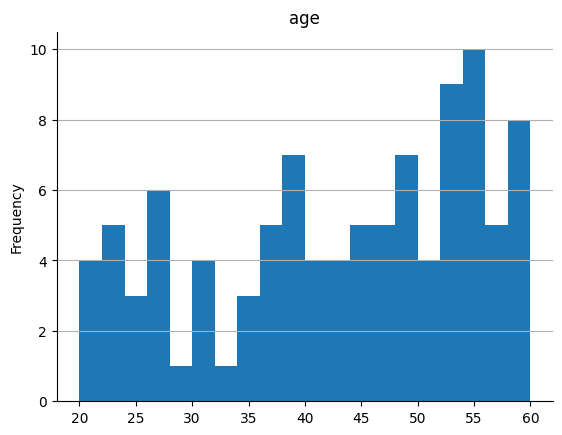

In [34]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True, axis='y')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 100 non-null    int64  
 1   full_name                   100 non-null    object 
 2   age                         100 non-null    int64  
 3   annual_income               100 non-null    int64  
 4   spending_score              100 non-null    int64  
 5   num_transactions            100 non-null    int64  
 6   last_purchase_days          100 non-null    int64  
 7   city                        100 non-null    object 
 8   first_name                  100 non-null    object 
 9   avg_spend_per_transaction   100 non-null    float64
 10  age_standardized            100 non-null    float64
 11  annual_income_standardized  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [36]:
df.isna().sum()

customer_id                   0
full_name                     0
age                           0
annual_income                 0
spending_score                0
num_transactions              0
last_purchase_days            0
city                          0
first_name                    0
avg_spend_per_transaction     0
age_standardized              0
annual_income_standardized    0
dtype: int64

In [37]:
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction,age_standardized,annual_income_standardized
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily,3.476190,0.198231,0.709146
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia,3.000000,-1.750191,-1.284276
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael,2.689655,-0.394767,-1.442714
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth,1.192308,-0.310053,0.153713
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia,4.470588,0.706515,1.416087
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,NEW YORK,William,5.333333,0.028803,-0.019268
96,1097,John Rodriguez,48,86556,22,16,32,LOS ANGELES,John,1.375000,0.452373,0.378196
97,1098,Alex Thomas,50,33343,32,28,34,MIAMI,Alex,1.142857,0.621801,-1.542287
98,1099,Jenny Martin,54,43500,98,32,28,LOS ANGELES,Jenny,3.062500,0.960657,-1.175716


In [39]:
df['transactions_per_month'] = df['num_transactions'] / (df['last_purchase_days'] / 30)

In [40]:
bins = [0, 10, 30, 60, np.inf]
labels = ['Very Recent', 'Recent', 'Moderate', 'Old']
df['recency_category'] = pd.cut(df['last_purchase_days'], bins=bins, labels=labels, right=False)

C:\Users\gokul\AppData\Local\Temp\ipykernel_14288\3084028394.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='recency_category', order=['Very Recent', 'Recent', 'Moderate', 'Old'], palette='pastel')


ValueError: Could not interpret value `age_group` for `x`. An entry with this name does not appear in `data`.

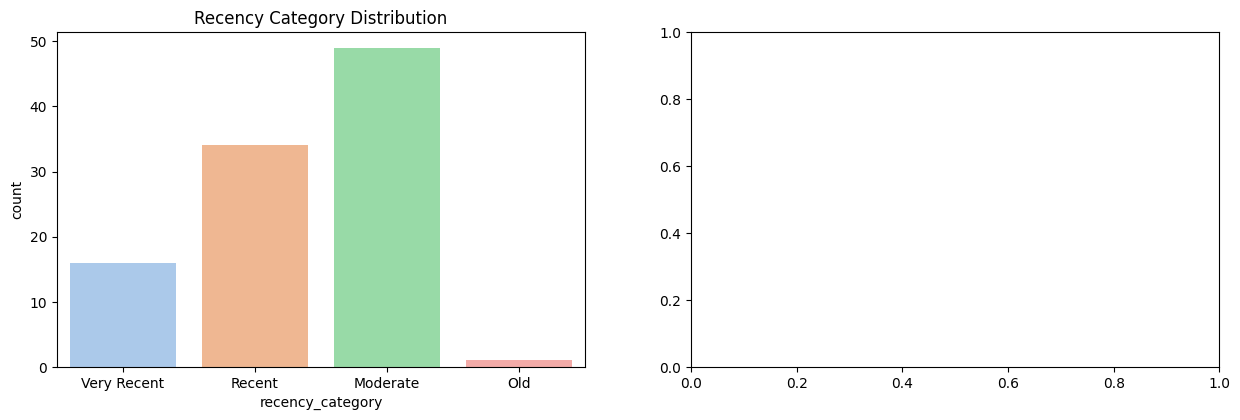

In [41]:

plt.figure(figsize=(15,20))

plt.subplot(4, 2, 1)
sns.countplot(data=df, x='recency_category', order=['Very Recent', 'Recent', 'Moderate', 'Old'], palette='pastel')
plt.title('Recency Category Distribution')

plt.subplot(4, 2, 2)
sns.countplot(data=df, x='age_group', order=['<25','25-34','35-44','45-54','55+'], palette='pastel')
plt.title('Age Group Distribution')

plt.subplot(4, 2, 3)
sns.countplot(data=df, x='income_group', palette='pastel')
plt.title('Income Group Distribution')

plt.subplot(4, 2, 4)
sns.histplot(df['transactions_per_month'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Transactions Per Month Distribution')



plt.tight_layout()
plt.show()

In [ ]:
age_bins = [0, 25, 35, 45, 55, 65]
age_labels = ['<25','25-34','35-44','45-54','55+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction,age_standardized,annual_income_standardized,recency_category,age_group
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily,3.476190,0.198231,0.709146,Moderate,45-54
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia,3.000000,-1.750191,-1.284276,Recent,<25
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael,2.689655,-0.394767,-1.442714,Moderate,35-44
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth,1.192308,-0.310053,0.153713,Recent,35-44
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia,4.470588,0.706515,1.416087,Very Recent,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,NEW YORK,William,5.333333,0.028803,-0.019268,Moderate,35-44
96,1097,John Rodriguez,48,86556,22,16,32,LOS ANGELES,John,1.375000,0.452373,0.378196,Moderate,45-54
97,1098,Alex Thomas,50,33343,32,28,34,MIAMI,Alex,1.142857,0.621801,-1.542287,Moderate,45-54
98,1099,Jenny Martin,54,43500,98,32,28,LOS ANGELES,Jenny,3.062500,0.960657,-1.175716,Recent,45-54


In [ ]:
income_bins = [0, 40000, 70000, 100000, np.inf]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['income_group'] = pd.cut(df['annual_income'], bins=income_bins, labels=income_labels, right=False)

In [ ]:
df['high_spender'] = (df['spending_score'] > 80).astype(int)

In [ ]:
df.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction,age_standardized,annual_income_standardized,recency_category,age_group,income_group,high_spender,transactions_per_month
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily,3.476190,0.198231,0.709146,Moderate,45-54,High,0,10.862069
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia,3.000000,-1.750191,-1.284276,Recent,<25,Medium,0,25.714286
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael,2.689655,-0.394767,-1.442714,Moderate,35-44,Low,0,24.166667
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth,1.192308,-0.310053,0.153713,Recent,35-44,High,0,30.000000
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia,4.470588,0.706515,1.416087,Very Recent,45-54,Very High,0,63.750000
